<a href="https://colab.research.google.com/github/rachmazamalia/MyBeans/blob/main/CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os, re, glob, cv2, numpy as np

path = os.path.abspath('TA_CNN.ipynb')
path = re.sub('[a-zA-Z\s._]+$','', path )
dirs = os.listdir('/content/drive/MyDrive/data/Dataset-BijiKopi.zip/')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/MyDrive/data/Dataset-BijiKopi.zip/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(150,150))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10): #sample
            im_arr.append({str(i):im})
    print("Data Set "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Data Set Grade 3 : 81
Data Set Grade 2 : 124
Data Set Grade 1 : 127


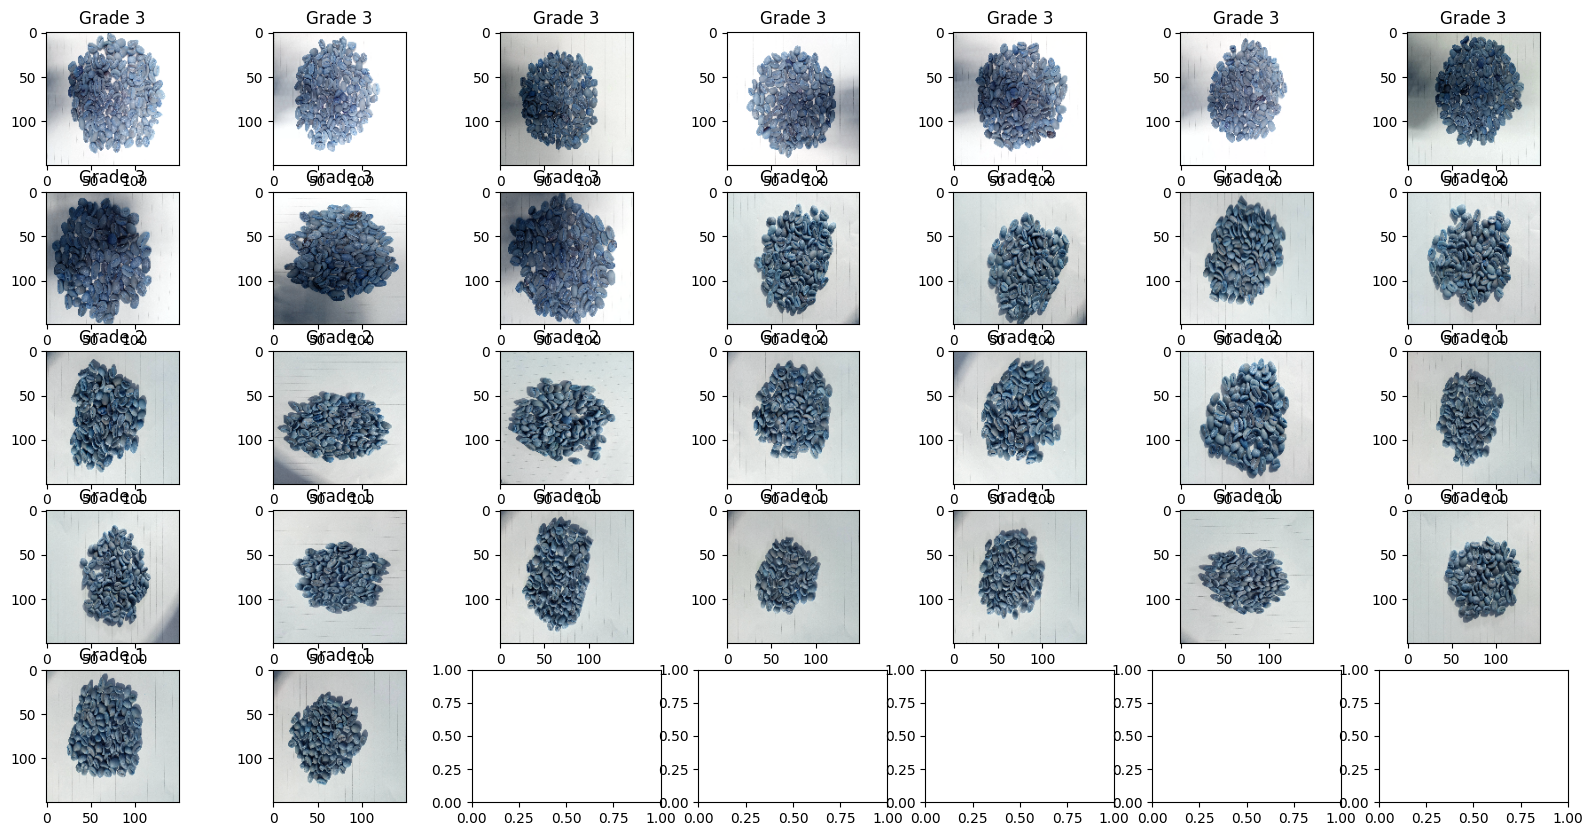

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,7, figsize=(20,10))
cnt = 0
row = 0
col = 0
for i in im_arr:
    for key, value in i.items():
        if(cnt==7):
          row = row + 1
          col = 0
          cnt = 0
        axs[row, col].imshow(value)
        axs[row, col].set_title(key)
        cnt = cnt + 1
        col = col + 1
plt.show()

In [4]:
# PREPROCESSING
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split (X, y, test_size=0.33, random_state=42)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [5]:
import tensorflow as tf
import keras.preprocessing.image
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # randomly rotate images 
    zoom_range=0.1,  # randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally 
    height_shift_range=0.1,  # randomly shift images vertically 
    horizontal_flip=True,  # randomly flip images horizontally
    fill_mode='nearest') 

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential() #model = sequential 

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,150,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
#model.add(Conv2D(32, (3, 3), activation='relu')) #layer convolutional 2D
#model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
#model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten
#model.add(Dense(128, activation='relu')) #fully connected layer
#model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(3, activation='softmax')) #softmax works

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 3)                 525699    
                                                                 
Total params: 526,595
Trainable params: 526,595
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [9]:
#TRAINING
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32)
scores = model.evaluate(x_test, y_test, verbose=0)
print("accuracy: %.2f%%"% (scores[1]*100))

Epoch 1/100
7/7 [==============================] - 6s 742ms/step - loss: 8.9047 - accuracy: 0.3649 - val_loss: 11.4516 - val_accuracy: 0.3727
Epoch 2/100
7/7 [==============================] - 4s 653ms/step - loss: 6.1024 - accuracy: 0.3604 - val_loss: 5.7934 - val_accuracy: 0.4455
Epoch 3/100
7/7 [==============================] - 5s 720ms/step - loss: 3.5553 - accuracy: 0.4955 - val_loss: 1.0741 - val_accuracy: 0.4182
Epoch 4/100
7/7 [==============================] - 5s 682ms/step - loss: 1.4288 - accuracy: 0.3784 - val_loss: 1.2351 - val_accuracy: 0.3545
Epoch 5/100
7/7 [==============================] - 4s 558ms/step - loss: 0.9551 - accuracy: 0.5225 - val_loss: 0.9602 - val_accuracy: 0.5364
Epoch 6/100
7/7 [==============================] - 4s 556ms/step - loss: 0.7236 - accuracy: 0.7748 - val_loss: 0.9961 - val_accuracy: 0.3818
Epoch 7/100
7/7 [==============================] - 6s 834ms/step - loss: 0.5567 - accuracy: 0.8694 - val_loss: 1.0407 - val_accuracy: 0.5273
Epoch 8/100


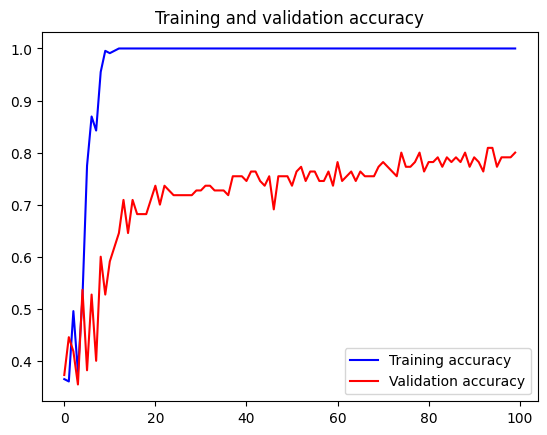

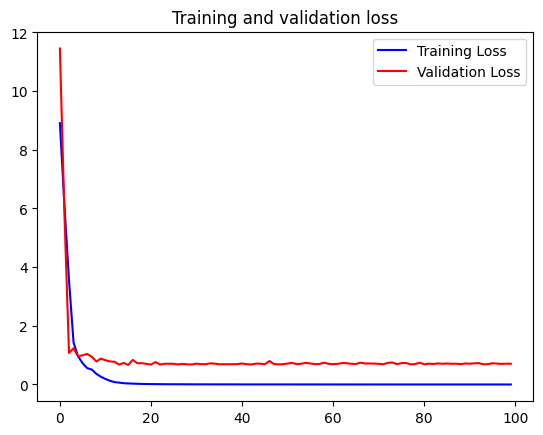

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
scores = model.evaluate(x_test, y_test)
scores = model.evaluate(x_train, y_train)

7/7 [==============================] - 1s 165ms/step - loss: 3.1764e-04 - accuracy: 1.0000


TRANSFER LEARNING

In [25]:
import tensorflow_hub as hub
import tensorflow as tf

mobilenet_v2 = "https://tfhub.dev/google/imagenet/resnet_v1_50/classification/5"
mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(150,150,3))
mobile_net_layers.trainable = False

mobilenet_model = tf.keras.Sequential([
    mobile_net_layers,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    # tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [26]:
mobilenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(0.005),
    metrics=['acc'])

In [27]:
hist = mobilenet_model.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test),
    epochs=10
    )

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 30s 4s/step - loss: 2.0391 - acc: 0.4640 - val_loss: 1.0005 - val_acc: 0.5818
Epoch 2/10
7/7 [==============================] - 27s 4s/step - loss: 0.8286 - acc: 0.5991 - val_loss: 0.5435 - val_acc: 0.7000
Epoch 3/10
7/7 [==============================] - 28s 4s/step - loss: 0.5900 - acc: 0.7387 - val_loss: 0.3804 - val_acc: 0.8273
Epoch 4/10
7/7 [==============================] - 24s 4s/step - loss: 0.4627 - acc: 0.7477 - val_loss: 0.4080 - val_acc: 0.8000
Epoch 5/10
7/7 [==============================] - 28s 4s/step - loss: 0.4252 - acc: 0.8063 - val_loss: 0.3713 - val_acc: 0.8455
Epoch 6/10
7/7 [==============================] - 27s 4s/step - loss: 0.4247 - acc: 0.8198 - val_loss: 0.2811 - val_acc: 0.8909
Epoch 7/10
7/7 [==============================] - 27s 4s/step - loss: 0.4019 - acc: 0.8153 - val_loss: 0.2437 - val_acc: 0.8909
Epoch 8/10
7/7 [==============================] - 27s 4s/step - loss: 0.3419 - acc: 0.8378 - val_loss: 0.3192 - val

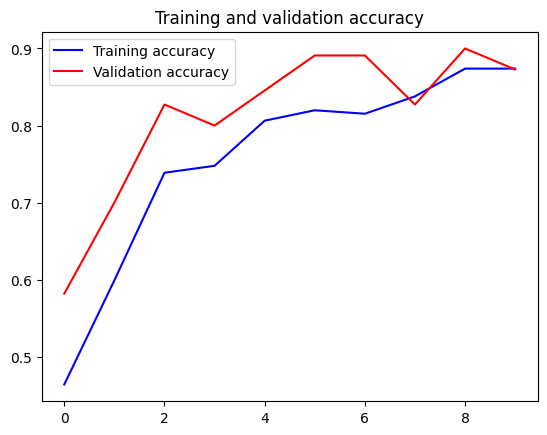

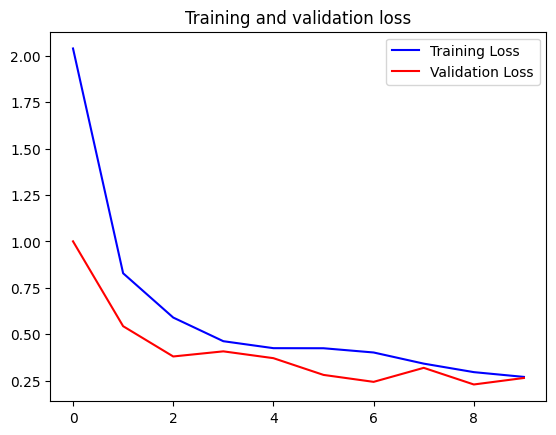

In [28]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
scores = mobilenet_model.evaluate(x_test, y_test)
scores = mobilenet_model.evaluate(x_train, y_train)

7/7 [==============================] - 16s 2s/step - loss: 0.1723 - acc: 0.9369


In [30]:
model.save('model.h5')
model.save('model')
!zip -r 'model.zip' 'model'

  adding: model/ (stored 0%)
  adding: model/assets/ (stored 0%)
  adding: model/saved_model.pb (deflated 87%)
  adding: model/fingerprint.pb (stored 0%)
  adding: model/keras_metadata.pb (deflated 86%)
  adding: model/variables/ (stored 0%)
  adding: model/variables/variables.index (deflated 58%)
  adding: model/variables/variables.data-00000-of-00001 (deflated 9%)


In [32]:
mobilenet_model.save('mobilenet_model.h5')
mobilenet_model.save('mobilenet_model')
!zip -r 'mobilenet_model.zip' 'mobilenet_model'

  adding: mobilenet_model/ (stored 0%)
  adding: mobilenet_model/assets/ (stored 0%)
  adding: mobilenet_model/saved_model.pb (deflated 92%)
  adding: mobilenet_model/fingerprint.pb (stored 0%)
  adding: mobilenet_model/keras_metadata.pb (deflated 87%)
  adding: mobilenet_model/variables/ (stored 0%)
  adding: mobilenet_model/variables/variables.index (deflated 80%)
  adding: mobilenet_model/variables/variables.data-00000-of-00001 (deflated 7%)


In [33]:
import pathlib

converter = tf.lite.TFLiteConverter.from_saved_model('model')

# Set the optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

531688

In [34]:
import pathlib

converter = tf.lite.TFLiteConverter.from_saved_model('mobilenet_model')

# Set the optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./mobilenet_model.tflite')
tflite_model_file.write_bytes(tflite_model)

26307296

PREDICT IMAGE

Saving IMG_3762.JPG to IMG_3762 (3).JPG
1/1 [==============================] - 0s 98ms/step
The image is classified as [0. 0. 1.]
Grade 1
Confidence = 100.0%


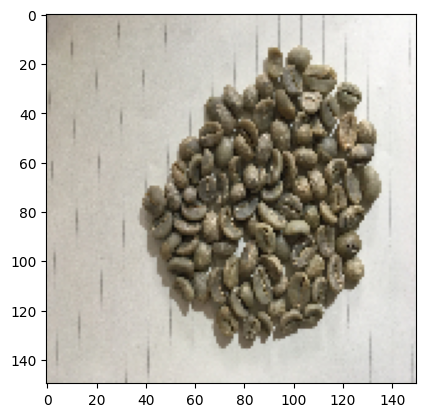

In [39]:
import numpy as np
import keras
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
 
  # Predicting Images
  path = fn
  img = load_img(path, target_size=(150,150,3))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  plt.imshow(img)
  img = np.expand_dims(img, axis = 0)
  predictions = model.predict(img)
  print("The image is classified as", predictions[0])
  predicted_class = dirs[np.argmax(predictions[0])]
  print(predicted_class)
  confidence = round(100 * (np.max(predictions[0])), 2)
  print("Confidence = {}%".format(confidence))